# Lesson 15 - Voting Classifiers

A voting classifier is a classification method that employs multiple classifiers to make predictions. It is very applicable in situations when a data scientist or machine learning engineer is confused about which classification method to use. Therefore, using the predictions from multiple classifiers, the voting classifier makes predictions based on the most frequent one.

### Additional Resources
* Hands-On Machine Learning, Ch 7


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from ClassificationPlotter import plot_regions

import warnings
warnings.filterwarnings('ignore')

## Generate the Data

In [2]:
from sklearn.datasets import make_circles, make_classification

**datasets.make_classification** generates a random n-class classification problem. This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative -dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class.

Parameters:
n_samples : int, optional (default=100) 
The number of samples.

n_features : int, optional (default=20) 
The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.

n_informative : int, optional (default=2) 
The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.

n_redundant : int, optional (default=2) 
The number of redundant features. These features are generated as random linear combinations of the informative features.

n_repeated : int, optional (default=0) 
The number of duplicated features, drawn randomly from the informative and the redundant features.

n_classes : int, optional (default=2) 
The number of classes (or labels) of the classification problem.

n_clusters_per_class : int, optional (default=2) 
The number of clusters per class.

weights : list of floats or None (default=None) 
The proportions of samples assigned to each class. If None, then classes are balanced. Note that if len(weights) == n_classes - 1, then the last class weight is automatically inferred. More than n_samples samples may be returned if the sum of weights exceeds 1.

flip_y : float, optional (default=0.01) 
The fraction of samples whose class are randomly exchanged. Larger values introduce noise in the labels and make the classification task harder.

class_sep : float, optional (default=1.0) 
The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.

hypercube : boolean, optional (default=True) 
If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.

shift : float, array of shape [n_features] or None, optional (default=0.0) 
Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].

scale : float, array of shape [n_features] or None, optional (default=1.0) 
Multiply features by the specified value. If None, then features are scaled by a random value drawn in [1, 100]. Note that scaling happens after shifting.

shuffle : boolean, optional (default=True) 
Shuffle the samples and the features.

random_state : int, RandomState instance or None (default) 
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

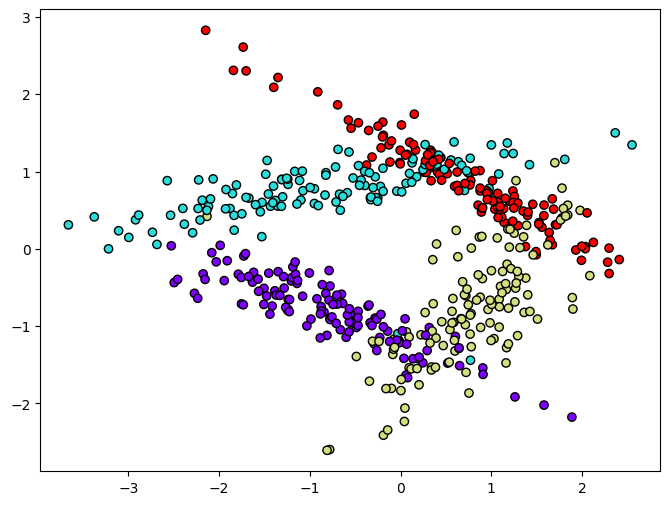

In [3]:
np.random.seed(4643)
X, y = make_classification(n_samples=500, n_classes=4, n_clusters_per_class=1, n_features=2, n_redundant=0, class_sep=0.8)
#the clusters are centered around the vertices of a square with -1<x0<1  and -1<x1<1
#(i.e. a hypercube of dimension n_features=2) 
plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k')
plt.show()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)
print(X_train.shape)
print(X_val.shape)

(250, 2)
(250, 2)


## Model 01 - Logistic Regression

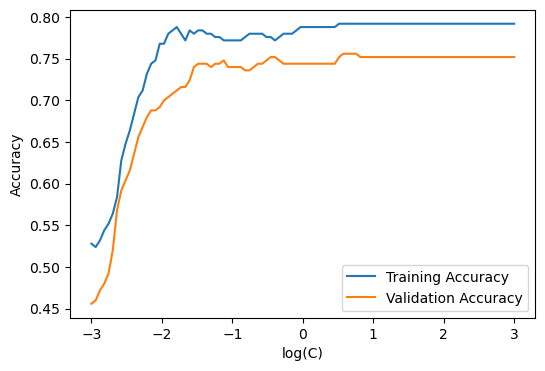

In [5]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-3, 3, 100)

for k in exp_list:
    temp_mod = LogisticRegression(solver='lbfgs', C=10**k, multi_class='auto')
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
idx = np.argmax(va_acc)
best_logC = exp_list[idx]
print(best_logC)

0.5757575757575757


In [7]:
mod_01 = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='auto')
mod_01.fit(X_train, y_train)

print('Training Accuracy:  ', mod_01.score(X_train, y_train))
print('Validation Accuracy:', mod_01.score(X_val, y_val))

Training Accuracy:   0.792
Validation Accuracy: 0.756


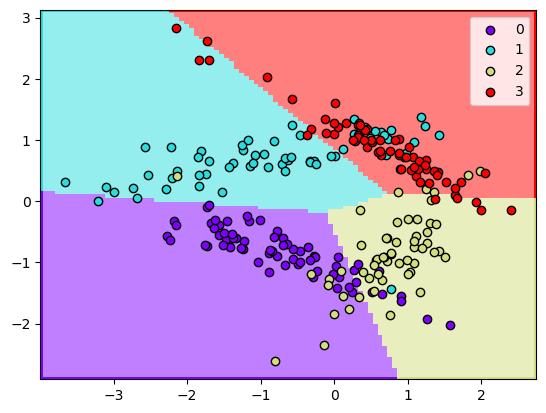

In [8]:
plot_regions(mod_01, X_train, y_train)

## Model 02 - K-Nearest Neighbors

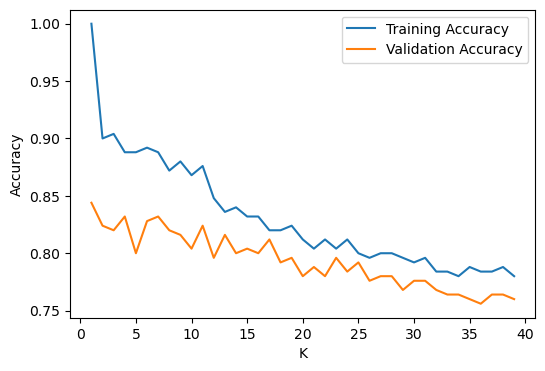

In [9]:
tr_acc = []
va_acc = []
K_list = range(1,40)

for k in K_list:
    temp_mod = KNeighborsClassifier(k)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(K_list, tr_acc, label='Training Accuracy')
plt.plot(K_list, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
idx = np.argmax(va_acc)
best_K = K_list[idx]
print(best_K)

1


In [11]:
mod_02 = KNeighborsClassifier(best_K)
mod_02.fit(X_train, y_train)

print('Training Accuracy:  ', mod_02.score(X_train, y_train))
print('Validation Accuracy:', mod_02.score(X_val, y_val))

Training Accuracy:   1.0
Validation Accuracy: 0.844


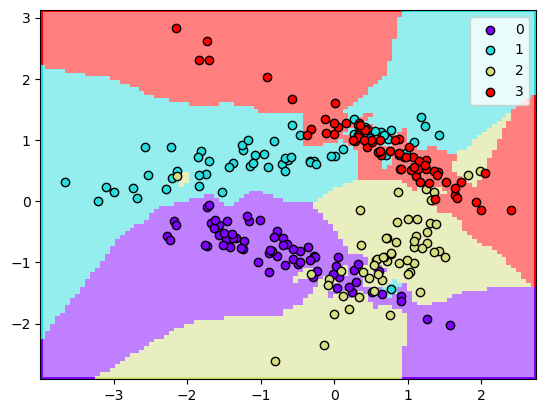

In [12]:
plot_regions(mod_02, X_train, y_train)

## Model 03 - Decision Tree

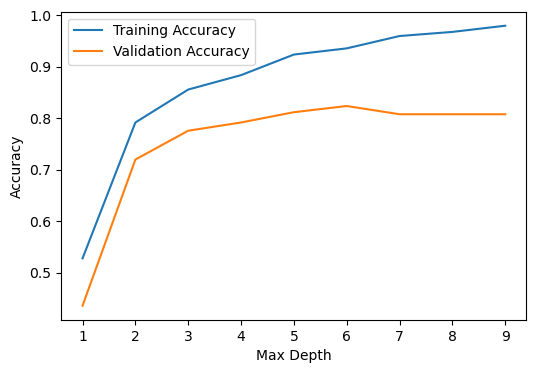

In [13]:
tr_acc = []
va_acc = []
depth_list = range(1,10)

for d in depth_list:
    temp_mod = DecisionTreeClassifier(max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

6


In [15]:
mod_03 = DecisionTreeClassifier(max_depth=best_d)
mod_03.fit(X_train, y_train)

print('Training Accuracy:  ', mod_03.score(X_train, y_train))
print('Validation Accuracy:', mod_03.score(X_val, y_val))

Training Accuracy:   0.936
Validation Accuracy: 0.812


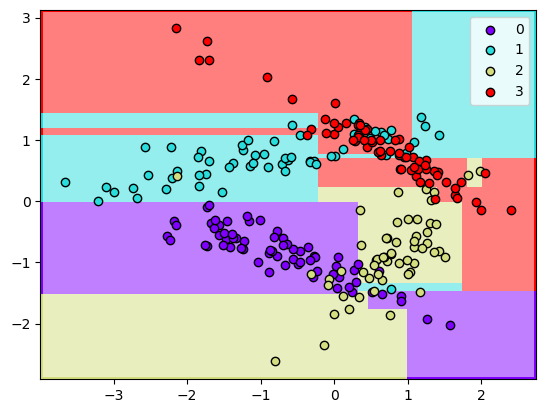

In [16]:
plot_regions(mod_03, X_train, y_train)

## Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier

The **voting classifier** has two basic hyperparameters: estimators and voting. The estimators hyperparameter creates a list for the objects of the three classifiers above while assigning names to them. The voting hyperparameter is set to either hard or soft.   If set to hard, the voting classifier will make judgments based on the predictions that appear the most. Otherwise, if set to soft, it will use a weighted approach to make its decision.

Consider the following example.  Suppose that we use 3 models in the VotingClassifier:  mod1, mod2, and mod3 and two classification values:  RED and BLUE.   Suppose that for a given observation (one row of values X)  mod1 predicts RED with probability .55,  mod2 predicts RED with probability .55, and mod3 predicts BLUE with probability .90.


In HARD voting the VotingClassifier predicts R (there 2 RED predictions and only 1 BLUE).  In SOFT voting the Voting Classifier predicts B (because RED has probability (0.55+0.55+0.10)/3 = .40,  and BLUE  1-0.40 = 0.60.



In [18]:
voting_clf = VotingClassifier(
    estimators = [('lr', mod_01), ('knn', mod_02), ('tree', mod_03)],
    voting = 'soft')

voting_clf.fit(X_train, y_train)

print('Training Accuracy:  ', voting_clf.score(X_train, y_train))
print('Validation Accuracy:', voting_clf.score(X_val, y_val))

Training Accuracy:   0.976
Validation Accuracy: 0.868


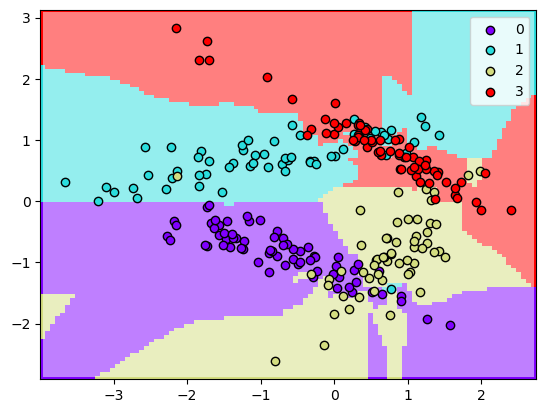

In [19]:
plot_regions(voting_clf, X_train, y_train)

In [20]:
print('Model 01 Validation Accuracy:', mod_01.score(X_val, y_val))
print('Model 02 Validation Accuracy:', mod_02.score(X_val, y_val))
print('Model 03 Validation Accuracy:', mod_03.score(X_val, y_val))
print('Ensemble Validation Accuracy:', voting_clf.score(X_val, y_val))

Model 01 Validation Accuracy: 0.756
Model 02 Validation Accuracy: 0.844
Model 03 Validation Accuracy: 0.812
Ensemble Validation Accuracy: 0.868
